# Hi I'm here to tell you some stories about the 2024 Major League Baseball Regular Season.

In [75]:
# Imports needed and config
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygwalker as pyg
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

In [76]:
# Importing the Datasets
# Datasets sourced from baseball-reference.com

#Team Stats
ts_b = pd.read_csv("mlb2024-regseason-teamstats-batting.csv")
ts_b_v = pd.read_csv("mlb2024-regseason-teamstats-batting-value.csv")
ts_p = pd.read_csv("mlb2024-regseason-teamstats-pitching.csv")
ts_p_v = pd.read_csv("mlb2024-regseason-teamstats-pitching-value.csv")
ts_war = pd.read_csv("mlb2024-regseason-teamstats-war.csv")

#Player Stats
ps_b = pd.read_csv("mlb2024-regseason-playerstats-batting.csv")
ps_p = pd.read_csv("mlb2024-regseason-playerstats-pitching.csv")

We'll be looking at a couple of datasets pulled from baseball-reference.com — <br>
<br>
Team Statistics:<br>
ts_b = Batting Stats<br>
ts_p = Pitching Stats<br>
ts_b_v = Batting Value<br>
ts_p_v = Pitching Value<br>
ts_war = Wins Above Replacement<br>
<br>
Player Statistics:<br>
ps_b = Batting Stats<br>
ps_p = Pitching Stats<br>
<br>
The goal of this is to find some interesting storylines from the 2024 MLB RS of players that had a good year but might've not had the recognition that they should've gotten due to being outshined by some others.
<br><br>
We'll be looking at individual stats and comparing them with overall team stats to see if they could've been good players but just on average teams. We'll look at the wealth gap between teams and see how much of that has an impact on certain players.

In [77]:
# Let's filter for qualification for the batting and pitching title for each team first.
ps_b_q = ps_b[ps_b['PA'] >= 502]
ps_p_q = ps_p[ps_p['IP'] >= 162]

In [78]:
tm = ps_b_q['Team'].unique()
print(tm)

['BOS' 'LAD' 'BAL' 'TEX' 'NYY' 'KCR' 'TOR' 'CIN' 'NYM' 'COL' 'PIT' 'PHI'
 'MIL' 'ATL' 'ARI' 'HOU' 'CLE' '2TM' 'SDP' 'LAA' 'CHC' 'STL' 'SFG' 'OAK'
 'MIN' 'SEA' 'TBR' 'CHW' 'WSN' 'DET' 'MIA']


In [79]:
# Ok now let's pick out the top five candidates for the batting and pitching title for each team.
# This is probably going to be very boring as I'll just be repeating the same thing 30 times x 2 so let's skip ahead to the results.

# Batting Title Candidates
# Group the DataFrame by 'Team'
grouped = ps_b_q.groupby('Team')

# Create a dictionary to hold the top player for each team
top5_b = {}

# Iterate over each group and find the top player based on 'WAR'
for team, group in grouped:
    top5_b[team] = group.nlargest(1, 'WAR')

# Concatenate the results into a single DataFrame
top5_b_df = pd.concat(top5_b.values())
top5_b_df.reset_index(drop=True, inplace=True)

# Create a dictionary to hold dataframes for each team
team_b_dfs = {}

# Iterate over each unique team and create a dataframe for each
for team, group in grouped:
    team_b_dfs[team] = top5_b_df[top5_b_df['Team'] == team]

# Print out just the names of the top player from each team
for team in team_b_dfs:
    print(f"Top Hitter from {team}: {team_b_dfs[team].iloc[0]['Player']}")

Top Hitter from 2TM: Isaac Paredes
Top Hitter from ARI: Ketel Marte#
Top Hitter from ATL: Marcell Ozuna
Top Hitter from BAL: Gunnar Henderson*
Top Hitter from BOS: Jarren Duran*
Top Hitter from CHC: Dansby Swanson
Top Hitter from CHW: Andrew Vaughn
Top Hitter from CIN: Elly De La Cruz#
Top Hitter from CLE: José Ramírez#
Top Hitter from COL: Brenton Doyle
Top Hitter from DET: Riley Greene*
Top Hitter from HOU: Yordan Alvarez*
Top Hitter from KCR: Bobby Witt Jr.
Top Hitter from LAA: Zach Neto
Top Hitter from LAD: Shohei Ohtani*
Top Hitter from MIA: Jesús Sánchez*
Top Hitter from MIL: William Contreras
Top Hitter from MIN: Carlos Santana#
Top Hitter from NYM: Francisco Lindor#
Top Hitter from NYY: Aaron Judge
Top Hitter from OAK: Brent Rooker
Top Hitter from PHI: Bryce Harper*
Top Hitter from PIT: Bryan Reynolds#
Top Hitter from SDP: Jackson Merrill*
Top Hitter from SEA: Cal Raleigh#
Top Hitter from SFG: Matt Chapman
Top Hitter from STL: Masyn Winn
Top Hitter from TBR: Yandy Díaz
Top Hitt

In [80]:
# Pitching Title Candidates
# Group the DataFrame by 'Team' without IP qualification
grouped = ps_p.groupby('Team')

# Create a dictionary to hold the top pitcher for each team
top_p = {}

# Iterate over each group and find the top pitcher based on 'WAR'
for team, group in grouped:
    top_p[team] = group.nlargest(1, 'WAR')

# Concatenate the results into a single DataFrame
top_p_df = pd.concat(top_p.values())
top_p_df.reset_index(drop=True, inplace=True)

# Create a dictionary to hold dataframes for each team
team_p_dfs = {}

# Iterate over each unique team and create a dataframe for each
for team, group in grouped:
    team_p_dfs[team] = top_p_df[top_p_df['Team'] == team]

# Print out the names and WAR of the top pitcher from each team
for team in team_p_dfs:
    if not team_p_dfs[team].empty:
        pitcher = team_p_dfs[team].iloc[0]
        print(f"Top Pitcher from {team}: {pitcher['Player']} (WAR: {pitcher['WAR']}, IP: {pitcher['IP']})")

Top Pitcher from 2TM: Erick Fedde (WAR: 5.6, IP: 177.1)
Top Pitcher from 3TM: Jesús Tinoco (WAR: 1.1, IP: 40.2)
Top Pitcher from 4TM: Matt Bowman (WAR: 0.3, IP: 30.2)
Top Pitcher from 5TM: Mike Baumann (WAR: -0.7, IP: 58.1)
Top Pitcher from ARI: Zac Gallen (WAR: 2.7, IP: 148.0)
Top Pitcher from ATL: Chris Sale* (WAR: 6.2, IP: 177.2)
Top Pitcher from BAL: Corbin Burnes (WAR: 3.4, IP: 194.1)
Top Pitcher from BOS: Tanner Houck (WAR: 3.5, IP: 178.2)
Top Pitcher from CHC: Shota Imanaga* (WAR: 3.0, IP: 173.1)
Top Pitcher from CHW: Erick Fedde (WAR: 4.7, IP: 121.2)
Top Pitcher from CIN: Hunter Greene (WAR: 6.3, IP: 150.1)
Top Pitcher from CLE: Emmanuel Clase (WAR: 4.4, IP: 74.1)
Top Pitcher from COL: Austin Gomber* (WAR: 2.1, IP: 165.0)
Top Pitcher from DET: Tarik Skubal* (WAR: 6.3, IP: 192.0)
Top Pitcher from HOU: Framber Valdez* (WAR: 4.5, IP: 176.1)
Top Pitcher from KCR: Seth Lugo (WAR: 5.3, IP: 206.2)
Top Pitcher from LAA: Tyler Anderson* (WAR: 3.1, IP: 179.1)
Top Pitcher from LAD: Tyler 

# Ok now that we've gotten that out of the way, something interesting here is that I'm seeing things like "2TM", "3TM", "4TM" and "5TM" didn't know that it would provide those stats for players that were traded and bounced around teams, that could be interesting to look at. Let's start to look at players who've bounced around teams and see if their performance was better or worse after moving to a better or worse team — be it financially or statistically.

In [81]:
# Let's find the batters who've played for more than one team
# Group by 'Player' and filter those who have appeared more than once
ps_b_mt = ps_b.groupby('Player').filter(lambda x: len(x) > 1)

# Select only the relevant columns for display
ps_b_mt = ps_b_mt[['Rk','Player', 'Age', 'Team', 'Lg', 'WAR', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+']]

# Display the result
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(ps_b_mt.to_string(index=False))

 Rk                Player  Age Team  Lg  WAR   G  PA  AB  R   H  2B  3B  HR  RBI  SB  CS  BB  SO    BA   OBP   SLG   OPS   OPS+
 23          Luis Arráez*   27  2TM  NL  1.0 150 672 637 83 200  32   3   4   46   9   3  24  29 0.314 0.346 0.392 0.739  106.0
 23          Luis Arráez*   27  MIA  NL  0.1  33 148 137 22  41   8   1   0    5   0   0   8  11 0.299 0.347 0.372 0.719   96.0
 23          Luis Arráez*   27  SDP  NL  0.9 117 524 500 61 159  24   2   4   41   9   3  16  18 0.318 0.346 0.398 0.744  108.0
 38       Randy Arozarena   29  2TM  AL  1.7 154 648 549 77 120  33   0  20   60  20  10  73 169 0.219 0.332 0.388 0.720  109.0
 38       Randy Arozarena   29  TBR  AL  0.7 100 409 350 45  74  19   0  15   37  16   7  45 101 0.211 0.318 0.394 0.712  104.0
 38       Randy Arozarena   29  SEA  AL  1.0  54 239 199 32  46  14   0   5   23   4   3  28  68 0.231 0.356 0.377 0.733  118.0
 44         Isaac Paredes   25  2TM 2LG  2.7 153 641 542 64 129  25   1  19   80   1   1  76 105 0.238 0

In [82]:
# Let's find the pitchers who've played for more than one team
# Group by 'Player' and filter those who have appeared more than once
ps_p_mt = ps_p.groupby('Player').filter(lambda x: len(x) > 1)

# Select only the relevant columns for display
ps_p_mt = ps_p_mt[['Player', 'Age', 'Team', 'Lg', 'WAR', 'G', 'GS', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'SO', 'ERA', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9']]

# Display the result
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(ps_p_mt.to_string(index=False))

              Player  Age Team  Lg  WAR  G  GS    IP   H  R  ER  HR  BB  SO   ERA   FIP  WHIP   H9  HR9  BB9  SO9
         Erick Fedde   31  2TM 2LG  5.6 31  31 177.1 154 66  65  20  52 154  3.30  3.86 1.162  7.8  1.0  2.6  7.8
         Erick Fedde   31  CHW  AL  4.7 21  21 121.2 105 43  42  14  34 108  3.11  3.77 1.142  7.8  1.0  2.5  8.0
         Erick Fedde   31  STL  NL  0.9 10  10  55.2  49 23  23   6  18  46  3.72  4.05 1.204  7.9  1.0  2.9  7.4
      Yusei Kikuchi*   33  2TM  AL  1.4 32  32 175.2 167 85  79  25  44 206  4.05  3.46 1.201  8.6  1.3  2.3 10.6
      Yusei Kikuchi*   33  TOR  AL  0.1 22  22 115.2 125 63  61  17  30 130  4.75  3.66 1.340  9.7  1.3  2.3 10.1
      Yusei Kikuchi*   33  HOU  AL  1.3 10  10  60.0  42 22  18   8  14  76  2.70  3.07 0.933  6.3  1.2  2.1 11.4
          Zach Eflin   30  2TM  AL  2.6 28  28 165.1 166 71  66  22  24 134  3.59  3.76 1.149  9.0  1.2  1.3  7.3
          Zach Eflin   30  TBR  AL  0.9 19  19 110.0 115 55  50  14  13  87  4.09  3.68 

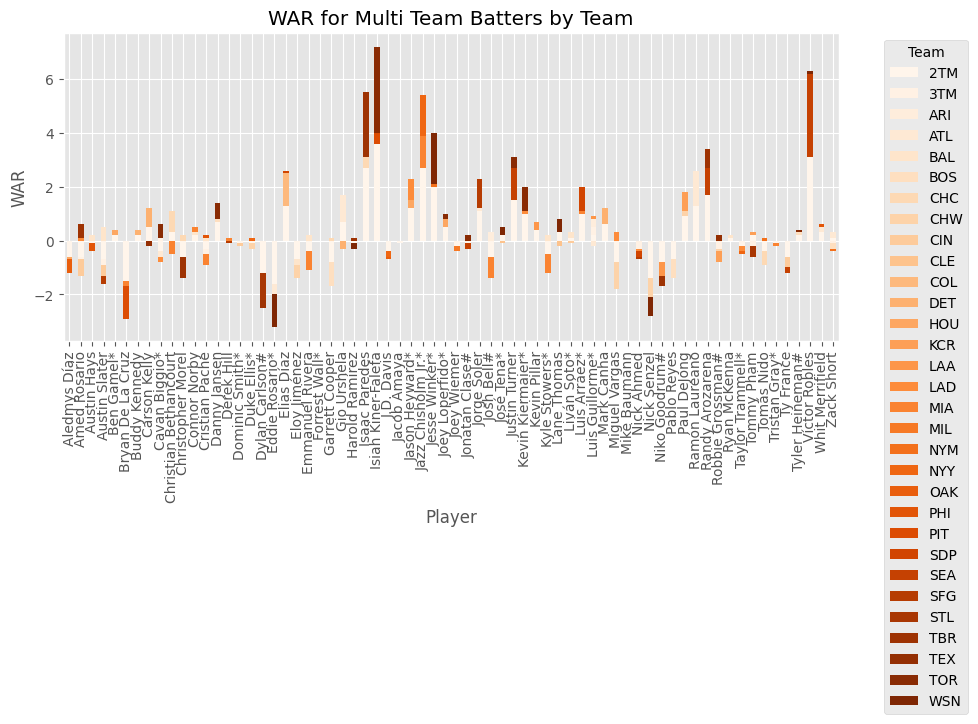

In [83]:
# Let's plot some graphs to visualize the data

# Plotting Multi Team Batters
# Group by 'Player' and 'Team' and sum the 'WAR' for each player-team combination
ps_b_mt_war = ps_b_mt.groupby(['Player', 'Team'])['WAR'].sum().unstack()

# Plot the WAR for each player with different colors for each team
ps_b_mt_war.plot(kind='bar', stacked=True, colormap='Oranges')
plt.title('WAR for Multi Team Batters by Team')
plt.xlabel('Player')
plt.ylabel('WAR')
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


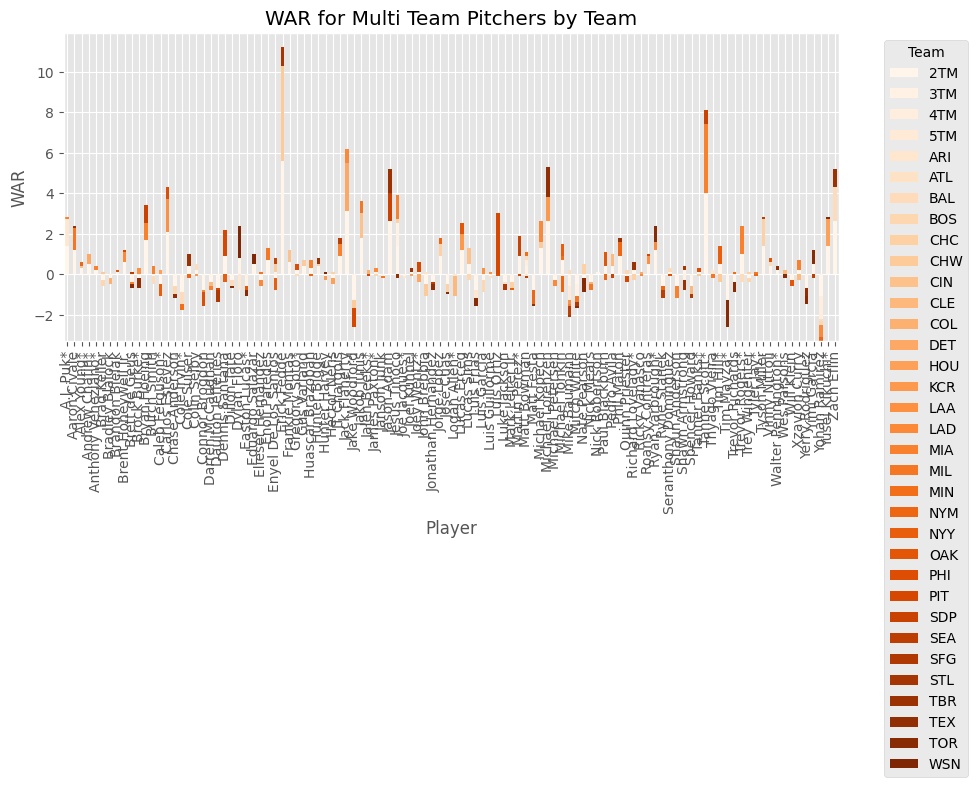

In [84]:
# Let's plot some graphs to visualize the data

# Plotting Multi Team Pitchers
# Group by 'Player' and 'Team' and sum the 'WAR' for each player-team combination
war_team = ps_p_mt.groupby(['Player', 'Team'])['WAR'].sum().unstack()

# Plot the WAR for each player with different colors for each team
war_team.plot(kind='bar', stacked=True, colormap='Oranges')
plt.title('WAR for Multi Team Pitchers by Team')
plt.xlabel('Player')
plt.ylabel('WAR')
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [85]:
# # IGNORE THIS IT DOESN'T WORK BUT I REALLY TRIED.

# # Filtering to show only players with significant changes in WAR.
# # First, let's filter out the multi-team summary rows (2TM, 3TM, etc.)
# war_team_filtered = war_team[~war_team.index.str.contains('TM')]

# # Calculate the difference between max and min WAR for each player
# war_diff = war_team_filtered.apply(lambda x: x.max() - x.min(), axis=1)

# # Filter for players with significant differences (e.g., WAR difference >= 1.0)
# significant_changes = war_team_filtered[war_diff >= 1.0]

# # Create a color map for the bars based on player name occurrences
# colors = []
# for player in significant_changes.index:
#     player_occurrences = duplicate_players[duplicate_players['Player'] == player].shape[0]
#     if player_occurrences == 2:
#         colors.extend(['#ffffff', '#ffa500cc'])  # Both teams in white
#     elif player_occurrences == 3:
#         colors.extend(['#ffffff', '#ffa500cc', '#ffa50033'])  # All three teams in white
#     elif player_occurrences == 4:
#         colors.extend(['#ffffff', '#ffa500cc', '#ffa50066', '#ffa50033'])  # Four tones of orange
#     elif player_occurrences == 5:
#         colors.extend(['#ffffff', '#ffa500cc', '#ffa50066', '#ffa50033', '#ffa5001a'])  # Five tones of orange

# # Create the plot
# plt.figure(figsize=(15, 8))
# significant_changes.plot(kind='bar', stacked=True, color=colors)

# plt.title('WAR for Multi Team Players - Significant Team Changes Only (≥1.0 WAR difference)')
# plt.xlabel('Player')
# plt.ylabel('WAR')
# plt.xticks(rotation=45, ha='right')
# plt.subplots_adjust(bottom=0.2, right=0.85)
# plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, axis='y')
# plt.show()


<Figure size 1500x800 with 0 Axes>

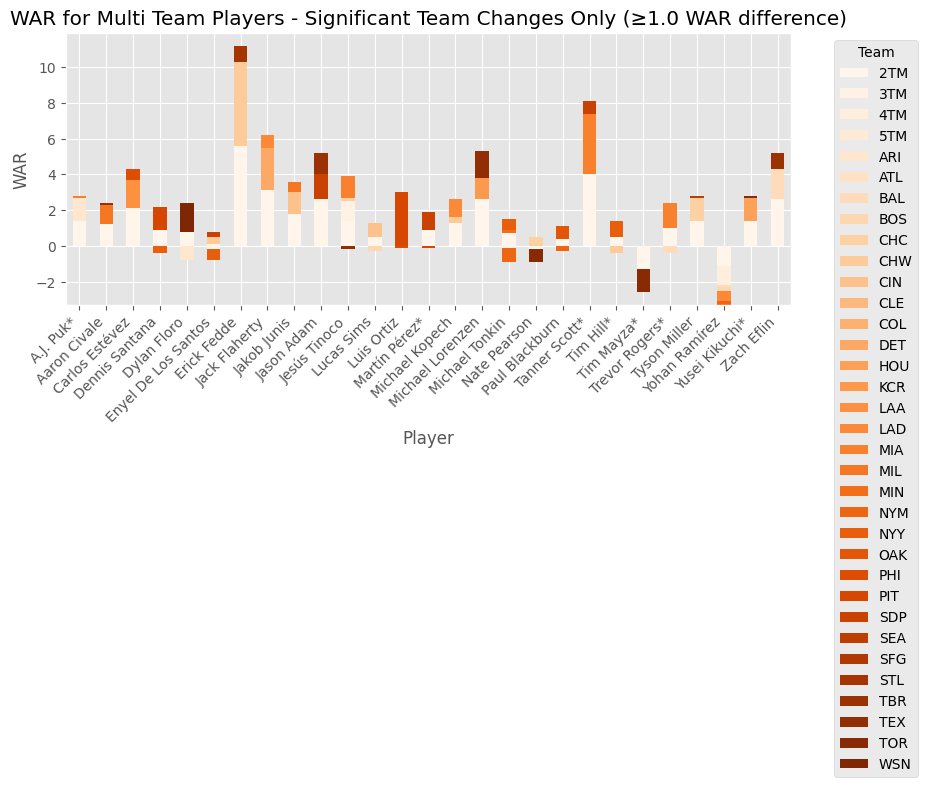

In [86]:
# Filtering to show only players with significant changes in WAR.
# First, let's filter out the multi-team summary rows (2TM, 3TM, etc.)
war_team_filtered = war_team[~war_team.index.str.contains('TM')]

# Calculate the difference between max and min WAR for each player
war_diff = war_team_filtered.apply(lambda x: x.max() - x.min(), axis=1)

# Filter for players with significant differences (e.g., WAR difference >= 1.0)
significant_changes = war_team_filtered[war_diff >= 1.0]

# Create the plot
plt.figure(figsize=(15, 8))
significant_changes.plot(kind='bar', stacked=True, colormap='Oranges')

plt.title('WAR for Multi Team Players - Significant Team Changes Only (≥1.0 WAR difference)')
plt.xlabel('Player')
plt.ylabel('WAR')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2, right=0.85)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.show()

In [87]:
# Display players with their index numbers beside their names
for index, player in enumerate(ps_b_mt_war.index):
    print(f"{index}: {player}")


0: Aledmys Díaz
1: Amed Rosario
2: Austin Hays
3: Austin Slater
4: Ben Gamel*
5: Bryan De La Cruz
6: Buddy Kennedy
7: Carson Kelly
8: Cavan Biggio*
9: Christian Bethancourt
10: Christopher Morel
11: Connor Norby
12: Cristian Pache
13: Danny Jansen
14: Derek Hill
15: Dominic Smith*
16: Duke Ellis*
17: Dylan Carlson#
18: Eddie Rosario*
19: Elias Díaz
20: Eloy Jiménez
21: Emmanuel Rivera
22: Forrest Wall*
23: Garrett Cooper
24: Gio Urshela
25: Harold Ramírez
26: Isaac Paredes
27: Isiah Kiner-Falefa
28: J.D. Davis
29: Jacob Amaya
30: Jason Heyward*
31: Jazz Chisholm Jr.*
32: Jesse Winker*
33: Joey Loperfido*
34: Joey Wiemer
35: Jonatan Clase#
36: Jorge Soler
37: Josh Bell#
38: José Tena*
39: Justin Turner
40: Kevin Kiermaier*
41: Kevin Pillar
42: Kyle Stowers*
43: Lane Thomas
44: Liván Soto*
45: Luis Arráez*
46: Luis Guillorme*
47: Mark Canha
48: Miguel Vargas
49: Mike Baumann
50: Nick Ahmed
51: Nick Senzel
52: Niko Goodrum#
53: Pablo Reyes
54: Paul DeJong
55: Ramón Laureano
56: Randy Aroz

# Ok let's pick out some interesting players
    - 1: Amed Rosario had positive WAR on one team and then negative WAR on a different one. 
    - 3: Austin Slater had positive WAR on one team and then negative WAR on a different one.
    - 22: Eddie Rosario was a below average player on one team and then a bad one on another.
    - 2: Isaac Paredes was an average player on one team and then a good one on another.
    - 12: Isiah Kiner-Falefa was an average player on one team and then a good one on another.
    - 4: Jazz Chisholm Jr. was an average player on one team and then a good one on another.
    - 11: Jesse Winker was an average player on one team and then a good one on another.

In [88]:
# List of players to filter
players_to_filter = ["Amed Rosario", "Austin Slater", "Eddie Rosario", "Isaac Paredes", "Isiah Kiner-Falefa", "Jazz Chisholm Jr.", "Jesse Winker"]

# Ensure the 'Player' column exists and filter the dataframe
if 'Player' in ps_b.columns:
    ps_b_mt_war_select = ps_b[ps_b['Player'].isin(players_to_filter)]
    # Display the result
    print(ps_b_mt_war_select.to_string(index=False))

 Rk             Player  Age Team  Lg  WAR   G  PA  AB  R   H  2B  3B  HR  RBI  SB  CS  BB  SO    BA   OBP   SLG   OPS  OPS+  rOBA  Rbat+  TB  GIDP  HBP  SH  SF  IBB     Pos Awards Player-additional
 44      Isaac Paredes   25  2TM 2LG  2.7 153 641 542 64 129  25   1  19   80   1   1  76 105 0.238 0.346 0.393 0.739 112.0 0.331  115.0 213    17   17   0   6    2  *53D/H     AS         paredis01
 44      Isaac Paredes   25  TBR  AL  2.4 101 429 363 41  89  19   1  16   55   0   1  52  68 0.245 0.357 0.435 0.792 127.0 0.349  129.0 158    13   12   0   2    2   53D/H    NaN         paredis01
 44      Isaac Paredes   25  CHC  NL  0.4  52 212 179 23  40   6   0   3   25   1   0  24  37 0.223 0.325 0.307 0.633  82.0 0.294   86.0  55     4    5   0   4    0     5/H    NaN         paredis01
133 Isiah Kiner-Falefa   29  2TM 2LG  3.6 133 496 465 53 125  18   4   8   43  11   2  16  78 0.269 0.306 0.376 0.683  92.0 0.308   93.0 175    12   10   3   2    0 456/H18    NaN         kineris01
133 Isiah 

# It is here when I realised I messed up, WAR is a cumulative stat. meaning I can't be comparing the player's WAR on different teams like I did above. Cause most trades happened at the trade deadline and that's about 2/3s of a season in, so they can't be gaining as much WAR as they did with more time in the earlier season. Let's try this again, with a non-cumulative stat for Hitters now let's look at OPS+.

 Rk                Player Team   OPS+
 23          Luis Arráez*  2TM  106.0
 23          Luis Arráez*  MIA   96.0
 23          Luis Arráez*  SDP  108.0
 38       Randy Arozarena  2TM  109.0
 38       Randy Arozarena  TBR  104.0
 38       Randy Arozarena  SEA  118.0
 44         Isaac Paredes  2TM  112.0
 44         Isaac Paredes  TBR  127.0
 44         Isaac Paredes  CHC   82.0
 60      Bryan De La Cruz  2TM   77.0
 60      Bryan De La Cruz  MIA   90.0
 60      Bryan De La Cruz  PIT   42.0
 63    Jazz Chisholm Jr.*  2TM  107.0
 63    Jazz Chisholm Jr.*  MIA   97.0
 63    Jazz Chisholm Jr.*  NYY  130.0
 70     Christopher Morel  2TM   80.0
 70     Christopher Morel  CHC   90.0
 70     Christopher Morel  TBR   57.0
 74            Josh Bell#  2TM   97.0
 74            Josh Bell#  MIA   89.0
 74            Josh Bell#  ARI  121.0
 89           Jorge Soler  2TM  121.0
 89           Jorge Soler  SFG  115.0
 89           Jorge Soler  ATL  134.0
108         Justin Turner  2TM  114.0
108         

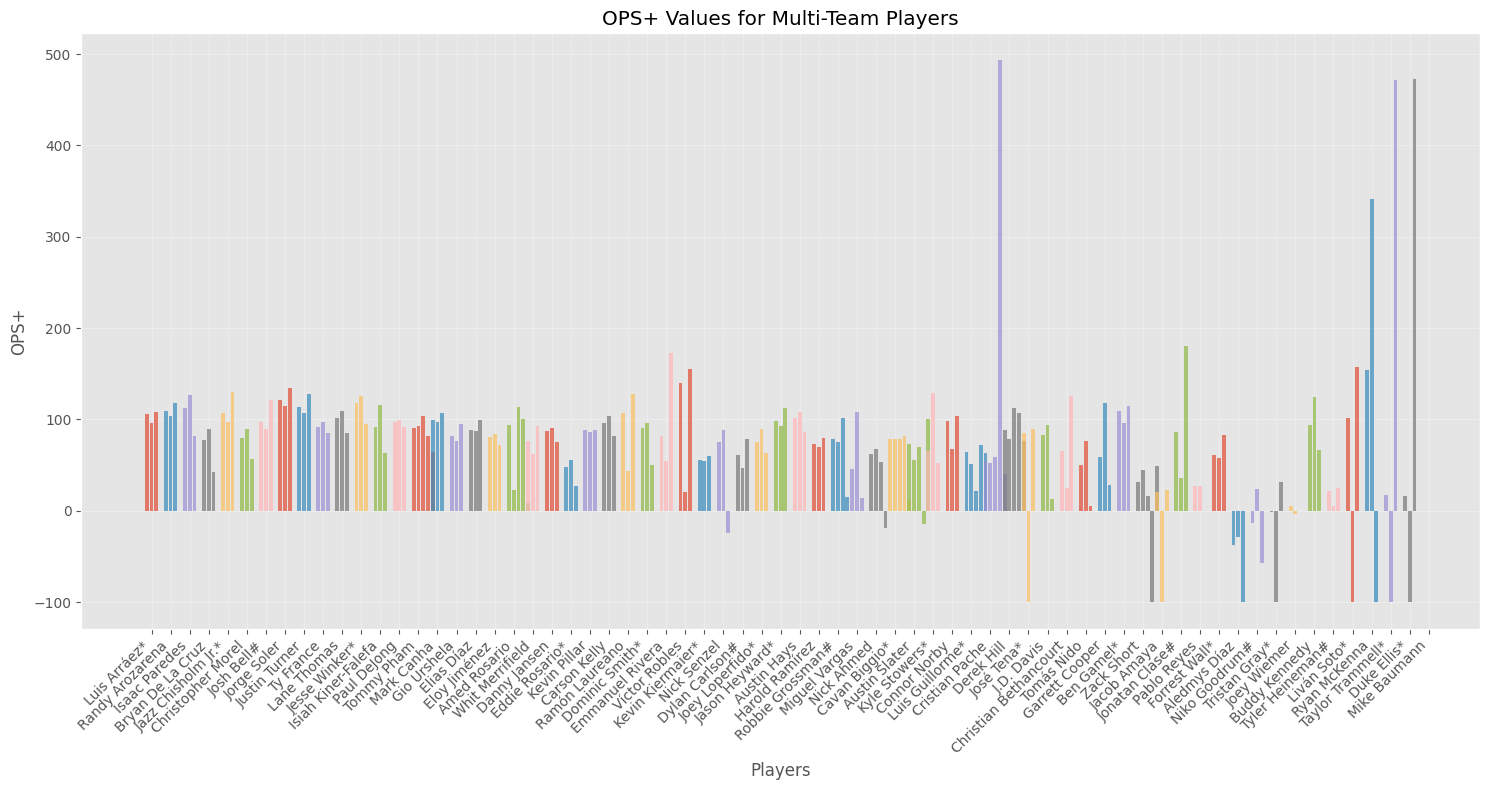

In [89]:
# Filter ps_b_mt to show only the OPS+ column
ps_b_mt_opsp = ps_b_mt[['Rk','Player', 'Team', 'OPS+']]

# Display the result
print(ps_b_mt_opsp.to_string(index=False))

# Plotting OPS+ values for each player
plt.figure(figsize=(15, 8))

# Iterate over each player and plot their OPS+ values (had some help with this)
for index, player in enumerate(ps_b_mt_opsp['Player'].unique()):
    player_data = ps_b_mt_opsp[ps_b_mt_opsp['Player'] == player]
    x_positions = [index + (i * 0.25) for i in range(len(player_data))]
    plt.bar(x_positions, player_data['OPS+'], width=0.2, label=player if index == 0 else "", alpha=0.7)

# Customize plot
plt.title('OPS+ Values for Multi-Team Players')
plt.xlabel('Players')
plt.ylabel('OPS+')
plt.xticks([i + 0.25 for i in range(len(ps_b_mt_opsp['Player'].unique()))], 
           ps_b_mt_opsp['Player'].unique(), rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Ok so off the bat (pun intended) we see some huge spikes for some players but those don't make sense to me, so let's see what's up with that.
- Cristian Pache
- José Tena*
- Ryan Mckenna
- Mike Baumann
# My hunch is that they only got a couple of good at bats, and that's an anomaly in the data.


In [90]:
# Ok let's pull up their stats.

ps_b_mt_opsp = ps_b_mt[['Rk','Player', 'Team', 'AB', 'OPS+']]

# Filter for specific players
filtered_players = ps_b_mt_opsp[ps_b_mt_opsp['Player'].isin(['Cristian Pache', 'José Tena*', 'Ryan McKenna', 'Mike Baumann'])]

# Display the result
print(filtered_players.to_string(index=False))

 Rk         Player Team  AB   OPS+
380 Cristian Pache  3TM 165   55.0
380 Cristian Pache  2TM 164   52.0
380 Cristian Pache  PHI 104   59.0
380 Cristian Pache  BAL   1  493.0
380 Cristian Pache  MIA  60   40.0
390     José Tena*  2TM 161   85.0
390     José Tena*  CLE   4 -100.0
390     José Tena*  WSN 157   90.0
601   Ryan McKenna  2TM  14  154.0
601   Ryan McKenna  BAL   8  341.0
601   Ryan McKenna  SFG   6 -100.0
654   Mike Baumann  2TM   0    NaN
654   Mike Baumann  BAL   0    NaN
654   Mike Baumann  SEA   0    NaN


# Yup my suspicions  were right.

You can see that that high number was because of a low number of At-Bats or because they didn't have any at bats. That most likely means that it's the same for all the other players that have had huge spikes. So I will be ignoring them moving forward.

# Picked out a couple of players that looks like they had either "significant" dips or increases across teams, and have a "good" amount of of at-bats.
This was also based on my general baseball knowledge, I knew these were more "everyday" players that would've seen significant time at the plate for the data to make sense, I also pulled them from the higher ranking end of the graph for the same reason, towards the lower ranking players they would be more "Replacement" or "Situational" players who would not have the same amount of game time.

- Bryan De La Cruz - Dip
- Jazz Chisholm Jr.* - Increase
- Justin Turner - Increase
- Isiah Kiner-Falefa - Dip
- Whit Merrifield - Increase

In [91]:
# Ok let's pull up their stats.

ps_b_mt_opsp = ps_b_mt[['Rk','Player', 'Team', 'AB', 'OPS+']]

# Filter for specific players
ps_b_mt_opsp = ps_b_mt_opsp[ps_b_mt_opsp['Player'].isin(['Bryan De La Cruz', 'Jazz Chisholm Jr.*', 'Justin Turner', 'Isiah Kiner-Falefa', 'Whit Merrifield'])]

# Display the result
print(ps_b_mt_opsp.to_string(index=False))

 Rk             Player Team  AB  OPS+
 60   Bryan De La Cruz  2TM 584  77.0
 60   Bryan De La Cruz  MIA 424  90.0
 60   Bryan De La Cruz  PIT 160  42.0
 63 Jazz Chisholm Jr.*  2TM 562 107.0
 63 Jazz Chisholm Jr.*  MIA 386  97.0
 63 Jazz Chisholm Jr.*  NYY 176 130.0
108      Justin Turner  2TM 460 114.0
108      Justin Turner  TOR 301 107.0
108      Justin Turner  SEA 159 128.0
133 Isiah Kiner-Falefa  2TM 465  92.0
133 Isiah Kiner-Falefa  TOR 257 116.0
133 Isiah Kiner-Falefa  PIT 208  63.0
258    Whit Merrifield  2TM 293  76.0
258    Whit Merrifield  PHI 156  62.0
258    Whit Merrifield  ATL 137  93.0


# Ok let's look at the teams that they're on.

Bryan De La Cruz was on two teams.
    Miami Marlins
    Pittsburgh Pirates

Jazz Chisholm Jr was on two teams.
    Miami Marlins
    New York Yankees

Justin Turner was on two teams.
    Toronto Blue Jays
    Seattle Mariners

Isiah Kiner-Falefa was on two teams.
    Toronto Blue Jays
    Pittsburgh Pirates

Whit Merrifield was on two teams.
    Philadelphia Phillies
    Atlanta Braves

In [92]:
# Ok let's pull up the team stats for those teams to see what kind of teams they are.

# Filter for specific teams
# ts_b
# ts_b_v
# ts_war

# Add the salary column from ts_b_v to ts_b and merge with WAR from ts_war
ts_b_s = ts_b.merge(ts_b_v[['Tm', 'Salary']], on='Tm', how='left')
ts_b_s = ts_b_s.merge(ts_war[['Tm', 'Total']], on='Tm', how='left')
ts_b_s.rename(columns={'Total': 'WAR'}, inplace=True)

# Let's only display the columns that we're interested in.
ts_b_s = ts_b_s[['Tm', 'Salary', 'WAR', 'OPS+', 'R', 'R/G']]
ts_b_s

# Filter for specific teams
ts_b_s_t = ts_b_s[ts_b_s['Tm'].isin(['Miami Marlins', 'Pittsburgh Pirates', 'New York Yankees', 'Toronto Blue Jays', 'Seattle Mariners', 'Philadelphia Phillies', 'Atlanta Braves'])]
ts_b_s_t

,Tm,Salary,WAR,OPS+,R,R/G
1,Atlanta Braves,"$123,577,300",12.7,100,704,4.35
14,Miami Marlins,"$60,021,000",-16.9,83,637,3.93
18,New York Yankees,"$170,726,700",13.9,115,815,5.03
20,Philadelphia Phillies,"$138,246,188",15.3,109,784,4.84
21,Pittsburgh Pirates,"$43,672,500",-8.3,87,665,4.10
23,Seattle Mariners,"$91,432,548",5.5,103,676,4.17
28,Toronto Blue Jays,"$123,498,001",-5.7,100,671,4.14


                       Tm        Salary   WAR  OPS+    R   R/G
20  Philadelphia Phillies  $138,246,188  15.3   109  784  4.84
18       New York Yankees  $170,726,700  13.9   115  815  5.03
1          Atlanta Braves  $123,577,300  12.7   100  704  4.35
23       Seattle Mariners   $91,432,548   5.5   103  676  4.17
28      Toronto Blue Jays  $123,498,001  -5.7   100  671  4.14
21     Pittsburgh Pirates   $43,672,500  -8.3    87  665  4.10
14          Miami Marlins   $60,021,000 -16.9    83  637  3.93


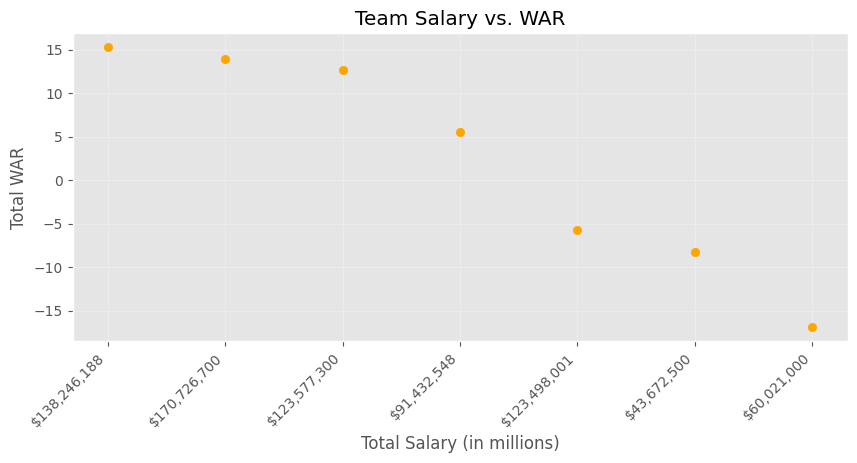

In [93]:
# Let's plot a graph to see the relationship between the team's total salary and their WAR.
ts_b_s_t = ts_b_s_t.sort_values(by='WAR', ascending=False) # Not sure why this isn't sorting it properly.
print(ts_b_s_t)
plt.scatter(ts_b_s_t['Salary'], ts_b_s_t['WAR'], color='orange')
plt.title('Team Salary vs. WAR')
plt.xlabel('Total Salary (in millions)')
plt.ylabel('Total WAR')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()

# From this it's quite apparent that teams that spend more money have higher WAR. Although the Phillies spending so much and still having negative WAR is quite weird, although baseball fans all know why, it's because of the inflated Harper/Turner/Nola/Realmuto contracts although I like those players, they're not performing. (Might pull their stats later).

# This got me curious about the rest of the league, let's take a look.

                       Tm        Salary   WAR  OPS+    R   R/G
20  Philadelphia Phillies  $138,246,188  15.3   109  784  4.84
18       New York Yankees  $170,726,700  13.9   115  815  5.03
13    Los Angeles Dodgers  $173,908,611  12.8   121  842  5.20
1          Atlanta Braves  $123,577,300  12.7   100  704  4.35
22       San Diego Padres   $79,526,255   9.9   107  760  4.69
10         Houston Astros  $154,795,133   9.8   111  740  4.60
15      Milwaukee Brewers   $72,540,800   9.7   101  777  4.80
2       Baltimore Orioles   $72,657,600   9.2   118  786  4.85
11     Kansas City Royals   $43,198,011   8.1    98  735  4.54
0    Arizona Diamondbacks   $88,480,452   6.4   115  886  5.47
3          Boston Red Sox  $118,951,108   6.0   104  751  4.64
23       Seattle Mariners   $91,432,548   5.5   103  676  4.17
7     Cleveland Guardians   $52,780,628   4.0    99  708  4.40
17          New York Mets  $173,347,500   2.0   108  768  4.74
26         Tampa Bay Rays   $43,265,700   1.6    92  60

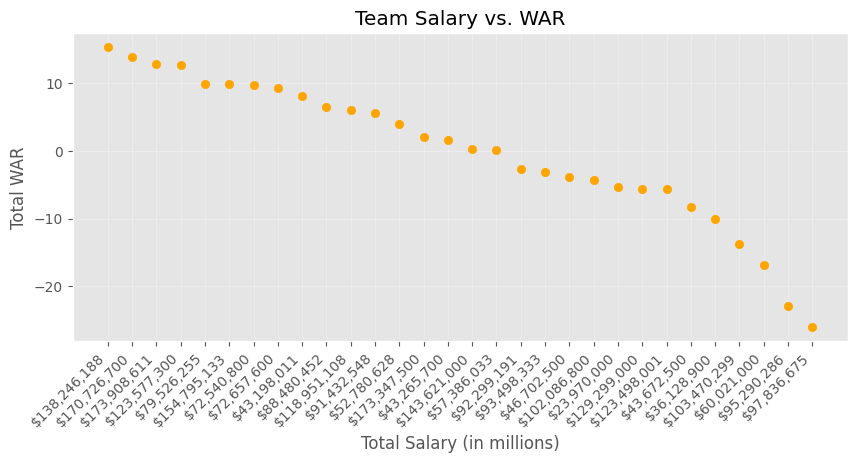

In [94]:
# ts_b_s = ts_b_s.sort_values(by='Salary', ascending=True) # Not sure why this isn't sorting it properly.
ts_b_s = ts_b_s.sort_values(by='WAR', ascending=False) # Not sure why this isn't sorting it properly.
print(ts_b_s)
plt.scatter(ts_b_s['Salary'], ts_b_s['WAR'], color='orange')
plt.title('Team Salary vs. WAR')
plt.xlabel('Total Salary (in millions)')
plt.ylabel('Total WAR')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()


In [95]:
# Filter teams with WAR above and below 0
ts_b_s_poswar = ts_b_s[ts_b_s['WAR'] > 0]
ts_b_s_negwar = ts_b_s[ts_b_s['WAR'] < 0]

# Convert 'Salary' column to numeric values by removing non-numeric characters - Wasn't doing what I need it to had to use some llm help here
ts_b_s_poswar['Salary'] = ts_b_s_poswar['Salary'].replace('[\$,]', '', regex=True).astype(float)
ts_b_s_negwar['Salary'] = ts_b_s_negwar['Salary'].replace('[\$,]', '', regex=True).astype(float)
ts_b_s['Salary'] = ts_b_s['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the average salary per team
ts_b_s_poswar_val = ts_b_s_poswar['Salary'].mean()
ts_b_s_negwar_val = ts_b_s_negwar['Salary'].mean()
ts_b_s_val = ts_b_s['Salary'].mean()

print(f"Average Salary per Team with WAR above 0: ${ts_b_s_poswar_val:.2f} million")
print(f"Average Salary per Team with WAR below 0: ${ts_b_s_negwar_val:.2f} million")
print(f"Average Salary per Team: ${ts_b_s_val:.2f} million")


Average Salary per Team with WAR above 0: $105790680.41 million
Average Salary per Team with WAR below 0: $80597960.38 million
Average Salary per Team: $94873835.07 million


<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:8: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vs/xs37hl812y7_g9k12gvs5tww0000gn/T/ipykernel_14402/4144338780.py:6: SyntaxWarning: invalid escape sequence '\$'
  ts_b_s_poswar['Salary'] = ts_b_s_poswar['Salary'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/vs/xs37hl812y7_g9k12gvs5tww0000gn/T/ipykernel_14402/4144338780.py:7: SyntaxWarning: invalid escape sequence '\$'
  ts_b_s_negwar['Salary'] = ts_b_s_negwar['Salary'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/vs/xs37hl812y7_g9k12gvs5tww0000gn/T/ipykernel_14402/4144338780.py:8: SyntaxWarning: invalid escape sequence '\$'
  ts_b_s['Salary'] = ts_b_s['Salary'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/vs/xs37hl812y7_g9k12gvs5tw

In [96]:
# Filter teams with salary above $100 million
ts_b_s_poswar_100m = ts_b_s_poswar[ts_b_s_poswar['Salary'] > 100000000]
ts_b_s_negwar_100m = ts_b_s_negwar[ts_b_s_negwar['Salary'] > 100000000]

# Count the number of teams
ts_b_s_poswar_100m = len(ts_b_s_poswar_100m)
ts_b_s_negwar_100m = len(ts_b_s_negwar_100m)

print(f"Number of teams with WAR above 0 and salary above $100 million: {ts_b_s_poswar_100m}")
print(f"Number of teams with WAR below 0 and salary above $100 million: {ts_b_s_negwar_100m}")

Number of teams with WAR above 0 and salary above $100 million: 8
Number of teams with WAR below 0 and salary above $100 million: 4


# Ok just looking at Salary and WAR across the league there's still some correlation between spending money and winning games.

# Average Salary per Team with WAR above 0: $105790680.41 million
# Average Salary per Team with WAR below 0: $80597960.38 million
# Average Salary per Team: $94873835.07 million

# Also based on looking at the graph above and doing a count, you can see that for teams above $100 million, they 8 of them have a positive WAR and 4 have a negative WAR.

# Although it's not definitive that spending money = winning games, baseball's not like that-ish. There's still some correleation, they are more likely to win more games than teams with a small payroll.
    Proven throughout with underdogs beating out big name teams to win championships over the years.

# Ok back to players we were looking at.

In [97]:
print(ts_b_s_t)
print(ps_b_mt_opsp)

                       Tm        Salary   WAR  OPS+    R   R/G
20  Philadelphia Phillies  $138,246,188  15.3   109  784  4.84
18       New York Yankees  $170,726,700  13.9   115  815  5.03
1          Atlanta Braves  $123,577,300  12.7   100  704  4.35
23       Seattle Mariners   $91,432,548   5.5   103  676  4.17
28      Toronto Blue Jays  $123,498,001  -5.7   100  671  4.14
21     Pittsburgh Pirates   $43,672,500  -8.3    87  665  4.10
14          Miami Marlins   $60,021,000 -16.9    83  637  3.93
      Rk              Player Team   AB   OPS+
65    60    Bryan De La Cruz  2TM  584   77.0
66    60    Bryan De La Cruz  MIA  424   90.0
67    60    Bryan De La Cruz  PIT  160   42.0
70    63  Jazz Chisholm Jr.*  2TM  562  107.0
71    63  Jazz Chisholm Jr.*  MIA  386   97.0
72    63  Jazz Chisholm Jr.*  NYY  176  130.0
123  108       Justin Turner  2TM  460  114.0
124  108       Justin Turner  TOR  301  107.0
125  108       Justin Turner  SEA  159  128.0
156  133  Isiah Kiner-Falefa  2TM  4

Ok let's look at this pairing of Bryan De La Cruz and Jazz Chisholm Jr, they both were traded from the Miami Marlins which sets a good baseline. They were both below average players with De La Cruz having a 90 OPS+ and Chisholm having a 97 OPS+ before being traded. They both had similar amount of playing time with the Marlins and with their second team. De La Cruz had 424 at bats with the Marlins and then 160 with the Pittsburgh Pirates, Chisholm had 386 at bats with the marlins and 176 with the New York Yankees.

If we look at the payroll for the Marlins it's around $60 million that's quite low compared to most teams with the average salary of teams being $90 million.

De La Cruz went to the Pirates, their salary was even lower than the Marlins at $43 million, his OPS+ also fell from 90 to 42. Even lower that his team's average OPS+ While on the other hand Chisholm went to the Yankees, The yankees have one of the highest salary in baseball at $170 million and made the World Series this year. Chisholm became a much better player with his OPS+ rising from 97 to 130. Higher than his team's average OPS+.

This shows that yes? going to a better team helps you have more chances at being a good player, but also it's not definitive.

Ok now let's look at another pairing. Justin Turner and Isisah Kiner-Falefa, we have a similar situation here. They were both on the Toronto Blue Jays before Turner was traded to the Seattle Mariner and Kiner-Falefa was traded to the Pittsburgh Pirates. The Blue Jays have an above average salary at 4123 million but have a negative WAR, they were not doing ok probably due to external factors, injuries and stuff but not due to lack of money, they have a bunch of stars.

Ok now we've kind of established that the Pirates is not the best place for a player to improve in this sense with De La Cruz above but we're seeing the same thing happen to Kiner Falefa, falling from a good OPS+ of 116 to 63, that's almost halved, similar to De La Cruz.

But here with have another interesting point, Turner went to a team with lower spending, the Mariners had a payroll of $91 million but they had positive WAR and were doing decently well throughout the season. We could see that Turner improved from a 107 OPS+ to 128 OPS+ from an average player to a good one, the team did not spend as much but they were having a good season, not as good as most, with the WAR just being at 5.5 but still decent. So money is not the only factor.

Last player we will be looking at will be Whit Merrifield, Merrifield started the season on the Philadelphia Phillies, a team with a high payroll of $138 million, and that has been doing really well with a high WAR at 15.3, it's a curious case, cause he was released and then went to the Atlanta Braves, the braves have a slightly lower payroll at $123 million and was doing just slightly worse than the Phillies with a WAR of 12.7 but still very respectable numbers. Merrifield went from a better team to a slightly weaker team but his OPS+ increased from 62 to 93 with about the same amount of playing time 156 at bats with the Phillies to 137 with the Braves. He went from being a very below average player (probably reason why he was released amongst others) to a just below average one. But this shows that an increase in production and value could also happen going the other way instead of only when players move on to better teams.

Didn't get to pitchers (It'll be a similar process looking at ERAs), cause I ran out of time, wasting a couple of hours looking at WAR and then having to redo this for the hitters, but I think this has been a great exercise for me to really understand more about the sport and that not everything is so binary in sports. Data brings alot of things to light but in a sport where there are so many factors, this has just been a very simplistic and preliminary way to approach looking at the game, I guess that's why Moneyball is such a big thing and was so revolutionary for the sport. I also have a new huge appreciation for channels like the Dorktown Jon Bois videos on Secret Base or Baseball Bits on Foolish Baseball, finding these narratives in sport is so interesting and after this class it feels like something that I could try to look at more to gain an even deeper appreciation for the game. I love watching those videos and I would always hope that there were more videos, but after doing this I realised why they took so long to make.